## Import packages

In [28]:
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import masw_functions as mf
import pickle
import os
import subprocess
%matplotlib inline

## Read data

Read the file **dispersion_1000.pkl** with the list of dispersion analysis by azimuth of shot **1000**

In [29]:
filedis="dispersion_1000.pkl"
if os.path.isfile(filedis):
    print(filedis+" exists.")
else: 
    url = 'https://filedn.com/lEzjnrJwSG47nSDwzIitUuf'
    folder='/Data/swi_python/'
    command = ['wget', url+folder+filedis]
    subprocess.run(command)
with open(filedis, 'rb') as f:
    DispersionAzimuth = pickle.load(f)

dispersion_1000.pkl exists.


In [30]:
from IPython.display import clear_output, display
import time
cmap = plt.get_cmap('viridis', 12)
vmin, vmax = 800,4000
DispersionCurves=[]
%matplotlib qt
for bidx in range(len(DispersionAzimuth)):  
    plt.figure()
    [Pn, freq, Xobs]=DispersionAzimuth[bidx]
    plt.imshow(Pn, aspect='auto', cmap=cmap, origin='lower', extent=[freq[0], freq[-1], vmin, vmax])
    plt.scatter(Xobs[:,0],Xobs[:,1],color='black')
    manager = plt.get_current_fig_manager()
    manager.full_screen_toggle()
    DispersionCurves.append(np.asarray(plt.ginput(n=-1,timeout=-1)) )
    plt.close()
%matplotlib inline

KeyboardInterrupt: 

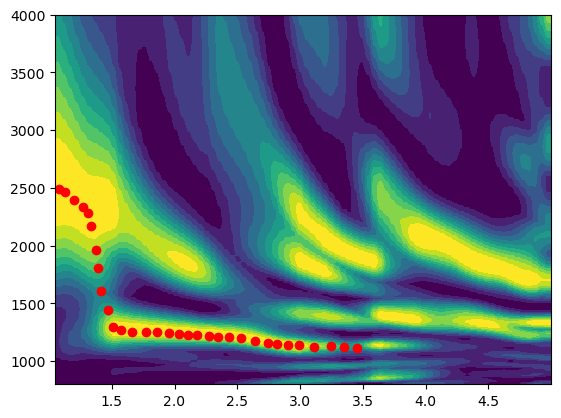

KeyboardInterrupt: 

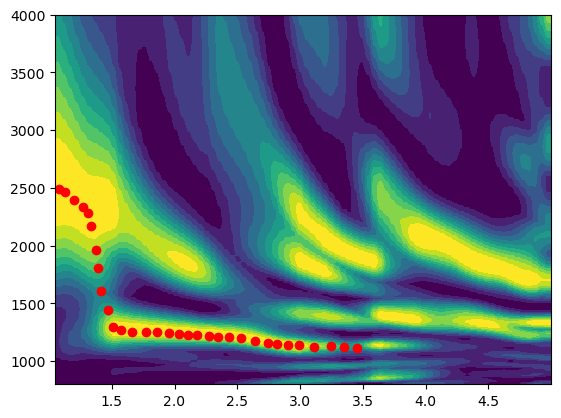

In [ ]:
from IPython.display import clear_output, display
import time
fig, ax = plt.subplots()
for bidx in range(len(DispersionAzimuth)):       
    [Pn, freq, Xobs]=DispersionAzimuth[bidx]
    pts=DispersionCurves[bidx]
    ax.clear()
    ax.imshow(Pn, aspect='auto', cmap=cmap, origin='lower', extent=[freq[0], freq[-1], vmin, vmax])
    ax.scatter(pts[:,0],pts[:,1],color='red')
    clear_output(wait=True)
    display(fig)
    time.sleep(1.0)
plt.close(fig)

In [ ]:
# Save Dispersion Analysis info as .pkl
if 0:
      import pickle
      filedis="picking_1000.pkl"
      if os.path.isfile(filedis):
            print(filedis+" exists.")
      else: 
            with open(filedis, 'wb') as f:
                  pickle.dump(DispersionCurves, f)